In [ ]:
# import importlib.util
# import sys

# # Define the file path
# file_path = rC:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\code\HRDiagram.py

# # Load the module
# spec = importlib.util.spec_from_file_location(HRDiagram, file_path)
# HRDiagram = importlib.util.module_from_spec(spec)
# sys.modules[HRDiagram] = HRDiagram
# spec.loader.exec_module(HRDiagram)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import h5py
from matplotlib.pyplot import figure
from scipy import stats
from scipy import stats
from scipy.stats import skewnorm
from HRDiagram import color_map_HR
from pathlib import Path
import matplotlib.patches as patches
pd.set_option('display.max_columns', None)
color_map_HR


<function HRDiagram.color_map_HR(DB, variable, name_of_var, title, saveLoc, examplePoint='F', examplePointRange='F', exampleLum=0, exampleTemp=0, exampleTempMin=0, exampleTempMax=0, exampleLumMin=0, exampleLumMax=0, Log1='F', S_R='T', minR=1.5, maxR=6.5, ylimit='T', style='dark_background', fileName='Default')>

In [2]:
# Set the base path relative to where the script is
base_path = Path().resolve().parent / 'data'

contact = pd.read_csv(base_path / 'contact.csv', low_memory=False)
LMXBs = pd.read_csv(base_path / 'lmxb.csv', low_memory=False)
HMXBs = pd.read_csv(base_path / 'hmxb.csv', low_memory=False)
detached = pd.read_csv(base_path / 'detached.csv', low_memory=False)
XBs = pd.read_csv(base_path / 'xb.csv', low_memory=False)
V404Dataset = pd.read_csv(base_path / 'V404dataset.csv', low_memory=False)

# EndStateDataset = pd.read_hdf(base_path / '1e+00_Zsun_population_max.h5', low_memory=False, key='history')

In [3]:
# SaveLoc = r'C:\Users\iatpuser\Desktop\Code\Honors-Independent-Study\graphs\testing\\'

figs_path = Path().resolve().parent / 'paper' / 'figs' / 'GeneratedFigs'

V404CyngiSaveLoc = Path().resolve().parent / 'paper' / 'figs' / 'GeneratedFigs' / 'V404_Cygni'

VelaX1SaveLoc = Path().resolve().parent / 'paper' / 'figs' / 'GeneratedFigs' / 'VelaX-1'

WUMaSaveLoc = Path().resolve().parent / 'paper' / 'figs' / 'GeneratedFigs' / 'W_Uma'


In [12]:
def MasterGrapher(db, SaveLoc, Title='Default', eccHisto='F', eccHistoFit='F', 
                  massHistoStar2='F', massHistoStar2Fit='F', HRDiagram='F', 
                  massHistoStar1='F', g6='F'):

    # Make sure SaveLoc is a Path object
    SaveLoc = Path(SaveLoc)
    SaveLoc.mkdir(parents=True, exist_ok=True)  # Make sure the directory exists

    # Graph 1: Eccentricity Histogram
    if eccHisto == 'T':
        fig = plt.figure()
        plt.hist(db['eccentricity'], bins=40)
        plt.title('Eccentricity Distribution in ' + Title)
        plt.xlabel('Eccentricity')
        plt.ylabel('Quantity')
        filename = SaveLoc / f"{Title}_Eccentricity_Distribution.png"
        plt.savefig(filename, dpi=200)
        plt.close(fig)

    # Graph 2: Eccentricity Histogram with Fitting
    if eccHistoFit == 'T':
        FilteredDB = db[db['eccentricity'] != 0]
        data = FilteredDB['eccentricity']

        fig = plt.figure()
        plt.hist(data, bins=75, density=True, alpha=0.6, color='blue', label='Histogram')

        shape, loc, scale = skewnorm.fit(data)
        x = np.linspace(min(data), max(data), 1000)
        pdf = skewnorm.pdf(x, shape, loc, scale)
        plt.plot(x, pdf, 'r-', label='Fitted Eccentricity Distribution', linewidth=2, linestyle='dashed')

        plt.xlabel('Eccentricity')
        plt.ylabel('Density')
        plt.title(Title + ' Eccentricity Distribution')
        plt.legend()
        filename = SaveLoc / f"{Title}_Eccentricity_Distribution_Fitted.png"
        plt.savefig(filename, dpi=200)
        plt.close(fig)

    # Graph 3: Star Two Mass Histogram
    if massHistoStar2 == 'T':
        fig = plt.figure()
        plt.hist(db['S2_mass'], bins=40)
        plt.title('Star Two Mass Distribution in ' + Title)
        plt.xlabel('Star Two Mass $M_{\\odot}$')
        plt.ylabel('Quantity')
        filename = SaveLoc / f"{Title}_Star_Two_Mass_Distribution.png"
        plt.savefig(filename, dpi=200)
        plt.close(fig)

    # Graph 4: Star One Mass Histogram
    if massHistoStar1 == 'T':
        fig = plt.figure()
        plt.hist(db['S1_mass'], bins=40)
        plt.title('Star One Mass Distribution in ' + Title)
        plt.xlabel('Star One Mass $M_{\\odot}$')
        plt.ylabel('Quantity')
        filename = SaveLoc / f"{Title}_Star_One_Mass_Distribution.png"
        plt.savefig(filename, dpi=200)
        plt.close(fig)

In [ ]:
MasterGrapher(contact, 
WUMaSaveLoc, 
'ContactBinaries', 
massHistoStar2 = 'T', 
massHistoStar1 = 'T')
# MasterGrapher(LMXBs, SaveLoc, 'Low Mass X-ray Binaries', massHistoStar2 = 'T', eccHisto = 'F', eccHistoFit= 'T', HRDiagram= 'T' )
# MasterGrapher(HMXBs, SaveLoc, 'High Mass X-ray Binaries', massHistoStar2 = 'T', eccHisto = 'F', eccHistoFit= 'T', HRDiagram= 'T')
# MasterGrapher(XBs, SaveLoc, 'X-ray Binaries', massHistoStar2 = 'T', eccHisto = 'T', eccHistoFit= 'T', HRDiagram= 'T')
# MasterGrapher(detached, SaveLoc, 'Detached Binaries', massHistoStar2 = 'T', eccHisto = 'T', eccHistoFit= 'T', HRDiagram= 'T')

In [ ]:
# Vela X-1

# color_map_HR(DB = XBs, 
    # variable= 'S2_mass', 
    # name_of_var=r'Star Two $M_{\odot}$', 
    # examplePoint='T', 
    # exampleLum=(1584893+630957)/2, 
    # exampleTemp = 33700, 
    # exampleTempMin= 33700 - 5200, 
    # exampleTempMax = 33700 + 5200, 
    # exampleLumMin = 630957, 
    # exampleLumMax= 1584893, 
    # title='Vela X-1 compared with X-ray binary populaton', 
    # saveLoc=VelaX1SaveLoc, 
    # ylimit='F', 
    # style='default', 
    # S_R = 5, 
    # fileName='VelaX1XrBPopulationHRComp')

# color_map_HR(DB = HMXBs, 
#     variable= 'S2_mass', 
#     name_of_var=r'Star Two $M_{\odot}$', 
#     examplePoint='T', 
#     examplePointRange = 'T',
#     exampleLum=(1584893+630957)/2, 
#     exampleTemp = 33700, 
#     exampleTempMin= 33700 - 5200, 
#     exampleTempMax = 33700 + 5200, 
#     exampleLumMin = 630957, 
#     exampleLumMax= 1584893, 
#     title='Vela X-1 compared with High Mass X-ray binary populaton', 
#     saveLoc=VelaX1SaveLoc, 
#     ylimit='F', 
#     style='default', 
#     # S_R = 5, 
#     fileName='VelaX1HMXBPopulationHRComp')


# color_map_HR(DB = HMXBs, 
#     variable= 'S2_mass', 
#     name_of_var=r'Star Two $M_{\odot}$', 
#     title='High Mass X-ray Binary (HMXBs) Donor Star Population', 
#     saveLoc=VelaX1SaveLoc, 
#     ylimit='F', 
#     style='default', 
#     fileName='HMXBHRPopulation')

# color_map_HR(DB = HMXBs, 
#     variable= 'S2_surface_h1', 
#     name_of_var= r'Sufrace Hydrogen (%)', 
#     title='High Mass X-ray Binary (HMXBs) Donor Star Population', 
#     saveLoc=VelaX1SaveLoc, 
#     ylimit='F', 
#     style='default', 
#     fileName='HMXBsSurfaceCompHRDiagram')



# V404 

# color_map_HR(DB = XBs, 
#     variable= 'S2_mass', 
#     name_of_var=r'Star Two $M_{\odot}$', 
#     examplePoint='T', 
#     exampleLum=8.7, 
#     examplePointRange= 'T', 
#     exampleLumMax= 8.7 + 1.7, 
#     exampleLumMin= 8.7 - 1.4,  
#     exampleTemp = 4274,
#     exampleTempMin = 4274 -113,
#     exampleTempMax = 4274 + 116,
#     title='V404 Cyngi HR Context', 
#     saveLoc=V404CyngiSaveLoc, 
#     ylimit='F', style='default', 
#     S_R = 5, 
#     fileName='V404XBsPopulationHRComp')

# color_map_HR(DB = EndStateDataset, variable= 'S2_mass', name_of_var=r'Star Two $M_{\odot}$', examplePoint='T', exampleLum=8.7, examplePointRange= 'T', exampleLumMax= 8.7+1.7, exampleLumMin= 8.7 - 1.4,  exampleTemp = 4274, title='V404 Cyngi HR Context', saveLoc=V404CyngiSaveLoc, ylimit='F', style='default', S_R = 5, fileName='V404EndStateDatasetPopulationHRComp')


# color_map_HR(DB = EntireDataset, variable= 'S2_mass', name_of_var=r'Star Two $M_{\odot}$', examplePoint='T', exampleLum=8.7, examplePointRange= 'T', exampleLumMax= 8.7+1.7, exampleLumMin= 8.7 - 1.4,  exampleTemp = 4274, title='V404 Cyngi HR Context', saveLoc=V404CyngiSaveLoc, ylimit='F', style='default', S_R = 5, fileName='V404EntireDatasetPopulationHRComp')

# W UMa

color_map_HR(DB = contact, 
    variable= 'S2_mass', 
    name_of_var=r'Star Two $M_{\odot}$', 
    examplePoint='T', 
    exampleLum=1.557, 
    exampleTemp = 6450, 
    title='W Ursae Majories HR Context', 
    saveLoc=WUMaSaveLoc, 
    ylimit='F', 
    style='default', 
    # S_R = 5, 
    fileName='WUMaHRDiagram')

color_map_HR(DB = contact, 
    variable= 'S2_mass', 
    name_of_var=r'Star Two $M_{\odot}$', 
    examplePoint='F', 
    exampleLum=1.557, 
    exampleTemp = 6450, 
    title='Contact Binaries HR Diagram', 
    saveLoc=WUMaSaveLoc, 
    ylimit='F', 
    style='default', 
    # S_R = 5, 
    fileName='ContactBinaryHRDiagram')


# posydon example

# color_map_HR(DB = EntireDataset, variable= 'S2_mass', name_of_var=r'Star Two $M_{\odot}$', title='Whole POSYDON Dataset', saveLoc=SaveLoc, ylimit='F', style='default', S_R = 5, fileName='WholePOSYDONDatasetExample')



TypeError: unsupported operand type(s) for +: 'WindowsPath' and 'str'

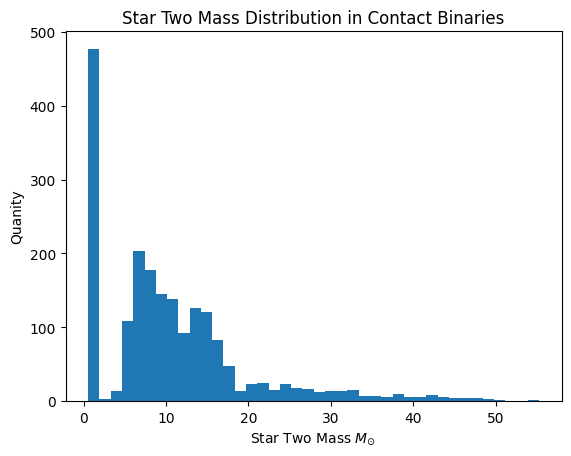

In [9]:
eccHisto = plt.figure()
plt.hist(contact['S2_mass'], bins=40)
plt.title('Star Two Mass Distribution in Contact Binaries')
plt.xlabel('Star Two Mass $M_{\\odot}$ ')
plt.ylabel('Quanity')
plt.savefig(WUMaSaveLoc + '.png')
plt.close(eccHisto)

In [7]:
contact

,state,event,time,orbital_period,eccentricity,rl_relative_overflow_1,rl_relative_overflow_2,lg_mtransfer_rate,mass_transfer_case,trap_radius,acc_radius,step_names,step_times,S1_state,S1_mass,S1_log_R,S1_log_L,S1_lg_mdot,S1_he_core_mass,S1_he_core_radius,S1_co_core_mass,S1_co_core_radius,S1_center_h1,S1_center_he4,S1_center_c12,S1_center_n14,S1_center_o16,S1_surface_h1,S1_surface_he4,S1_surface_c12,S1_surface_n14,S1_surface_o16,S1_log_LH,S1_log_LHe,S1_log_LZ,S1_log_Lnuc,S1_center_gamma,S1_avg_c_in_c_core,S1_surf_avg_omega,S1_surf_avg_omega_div_omega_crit,S1_total_moment_of_inertia,S1_log_total_angular_momentum,S1_spin,S1_envelope_binding_energy,S1_lambda_CE_1cent,S1_lambda_CE_10cent,S1_lambda_CE_30cent,S1_lambda_CE_pure_He_star_10cent,S2_state,S2_mass,S2_log_R,S2_log_L,S2_lg_mdot,S2_he_core_mass,S2_he_core_radius,S2_co_core_mass,S2_co_core_radius,S2_center_h1,S2_center_he4,S2_center_c12,S2_center_n14,S2_center_o16,S2_surface_h1,S2_surface_he4,S2_surface_c12,S2_surface_n14,S2_surface_o16,S2_log_LH,S2_log_LHe,S2_log_LZ,S2_log_Lnuc,S2_center_gamma,S2_avg_c_in_c_core,S2_surf_avg_omega,S2_surf_avg_omega_div_omega_crit,S2_total_moment_of_inertia,S2_log_total_angular_momentum,S2_spin,S2_envelope_binding_energy,S2_lambda_CE_1cent,S2_lambda_CE_10cent,S2_lambda_CE_30cent,S2_lambda_CE_pure_He_star_10cent
0,contact,END,1.000000e+08,2.119257e+00,0.0,0.124976,0.125017,-5.456821,NaN,0.0,0.0,step_end,0.000030,H-rich_Core_H_burning,36.157421,1.087865,5.603962,-6.504174,0.0,0.0,0.0,0.0,0.322934,0.663213,0.000072,0.008856,0.000061,0.617044,0.368968,0.000541,0.006859,0.001718,5.604425,-22.731309,2.153979,5.604579,0.011217,NaN,0.000034,0.630100,2.155891e+57,52.868956,6.422077,-2.666522e+50,1.513206,1.513206,1.513206,1.513206,H-rich_Core_H_burning,40.178350,1.108797,5.559846,-5.217734,0.0,0.0,0.0,0.0,0.404748,0.581397,0.000070,0.008847,0.000074,0.709827,0.275910,0.001776,0.002149,0.005454,5.560183,-23.401735,2.110634,5.560337,0.010392,NaN,0.000034,0.634866,2.886658e+57,52.993975,6.937991,-3.154517e+50,1.506299,1.506299,1.506299,1.506299
1,contact,END,1.000000e+08,9.597746e-01,0.0,0.109880,0.107255,-7.072188,NaN,0.0,0.0,step_end,0.000029,H-rich_Core_H_burning,14.218846,0.719301,4.276016,-7.106556,0.0,0.0,0.0,0.0,0.637708,0.348337,0.000049,0.008202,0.000839,0.715450,0.270312,0.002447,0.000820,0.006079,4.276443,-28.336940,0.833810,4.276600,0.014134,NaN,0.000076,0.465551,2.488932e+56,52.275514,10.588943,-1.065987e+50,1.367662,1.367662,1.367662,1.367662,H-rich_Core_H_burning,14.906818,0.727648,4.330744,-7.029951,0.0,0.0,0.0,0.0,0.639723,0.346315,0.000049,0.008147,0.000901,0.715493,0.270277,0.002504,0.000746,0.006087,4.331144,-28.178695,0.888104,4.331301,0.013819,NaN,0.000076,0.469658,2.765522e+56,52.321209,10.702986,-1.131888e+50,1.388831,1.388831,1.388831,1.388831
2,contact,END,1.000000e+08,8.421809e-01,0.0,0.238785,0.231894,-6.614456,NaN,0.0,0.0,step_end,0.000030,H-rich_Core_H_burning,11.089041,0.691162,3.997608,-6.619498,0.0,0.0,0.0,0.0,0.595295,0.390788,0.000048,0.008465,0.000540,0.715109,0.270605,0.002102,0.001267,0.006028,3.997998,-28.939104,0.556468,3.998155,0.016177,NaN,0.000086,0.532666,1.486798e+56,52.105579,11.815991,-7.676969e+49,1.231469,1.231469,1.231469,1.231469,H-rich_Core_H_burning,12.026541,0.704743,4.093684,-6.609987,0.0,0.0,0.0,0.0,0.602848,0.383219,0.000049,0.008353,0.000668,0.715148,0.270572,0.002149,0.001203,0.006038,4.094020,-28.677018,0.652078,4.094177,0.015508,NaN,0.000086,0.538976,1.770052e+56,52.184011,12.021756,-8.538396e+49,1.265469,1.265469,1.265469,1.265469
3,contact,END,1.000000e+08,1.589771e+00,0.0,0.140511,0.090571,-8.571238,NaN,0.0,0.0,step_end,0.000029,H-rich_Core_H_burning,2.865585,0.627849,2.829970,-9.213291,0.0,0.0,0.0,0.0,0.215379,0.770758,0.000044,0.008854,0.000100,0.656185,0.329691,0.000910,0.005141,0.003189,2.830059,-29.838685,-0.607964,2.830218,0.037230,NaN,0.000046,0.419978,9.263363e+54,50.628784,5.903729,-1.177028e+49,0.620955,0.620955,0.360787,0.620955,H-rich_Core_H_burning,6.775628,0.780315,3.516582,-7.974